## 1

In [0]:
from keras import backend as K
from keras import metrics


from pathlib import Path
import pandas as pd
import numpy as np
import json
import glob
import os
import os
import cv2
import glob
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from mlxtend.plotting import plot_confusion_matrix
from scipy import ndimage
import skimage
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit as s_split
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Input, Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, UpSampling2D, Flatten, Reshape, Convolution2D
from keras.layers import SeparableConv2D, BatchNormalization, LSTM
from keras.layers import Average, Concatenate, LeakyReLU, Add, ELU, PReLU, ReLU
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop, Adam
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras import backend as BE
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
from keras.layers import Lambda, Convolution1D,concatenate
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from keras import regularizers
from keras.optimizers import SGD, Adam, RMSprop
from keras import regularizers
# Import Fashion MNIST dataset
from keras.datasets import fashion_mnist

np.random.seed(42)

In [12]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

(x_train.shape, x_test.shape)

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)           0         
__________

In [0]:
encoder = Model(
    inputs=autoencoder.input, 
    outputs=autoencoder.get_layer('flatten_1').output)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
Total para

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.3566 - val_loss: 0.3071
Epoch 2/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.3003 - val_loss: 0.2984
Epoch 3/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.2946 - val_loss: 0.2948
Epoch 4/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.2915 - val_loss: 0.2921
Epoch 5/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.2892 - val_loss: 0.2903
Epoch 6/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.2874 - val_loss: 0.2885
Epoch 7/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.2858 - val_loss: 0.2874
Epoch 8/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.2844 - val_loss: 0.2858
Epoch 9/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.2833 - val_

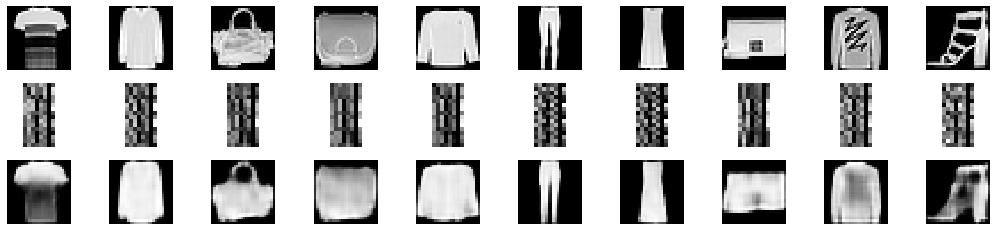

In [0]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2.
## 2.1

In [29]:
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

UsageError: unrecognized arguments: # Only use this if using iPython


In [0]:
x_train.shape

(60000, 28, 28)

In [30]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
# Importing the required Keras modules containing model and layers


# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 27s 455us/step - loss: 0.4201 - acc: 0.8508
Epoch 2/50
60000/60000 [==============================] - 23s 391us/step - loss: 0.2848 - acc: 0.8963
Epoch 3/50
60000/60000 [==============================] - 28s 468us/step - loss: 0.2393 - acc: 0.9120
Epoch 4/50
60000/60000 [==============================] - 24s 392us/step - loss: 0.2101 - acc: 0.9216
Epoch 5/50
60000/60000 [==============================] - 24s 398us/step - loss: 0.1863 - acc: 0.9311
Epoch 6/50
60000/60000 [==============================] - 24s 393us/step - loss: 0.1646 - acc: 0.9398
Epoch 7/50
60000/60000 [==============================] - 29s 479us/step - loss: 0.1478 - acc: 0.9449
Epoch 8/50
60000/60000 [==============================] - 24s 402us/step - loss: 0.1336 - acc: 0.9507
Epoch 9/50
60000/60000 [==============================] - 24s 392us/step - loss: 0.1212 - acc: 0.9547
Epoch 10/50
60000/60000 [==============================] - 25s 412us/step - loss: 

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6042035289546475
Test accuracy: 0.9117


For the Training set, the accuracy of the model with 50 epochs is 0.9892.

For the Test set, the accuracy of the model with 50 epochs is 0.9117.

## 2.2

In [47]:
#Reload the data to get a different size
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')
x_train=np.dstack([x_train] * 3)
x_test=np.dstack([x_test]*3)
x_train = x_train.reshape(x_train.shape[0],28,28,3).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,3).astype('float32')
x_train = np.asarray(
    [img_to_array(
        array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_test = np.asarray(
    [img_to_array(
        array_to_img(im, scale=False).resize((48,48))) for im in x_test])

x_train = x_train / 255
x_test = x_test / 255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

(60000, 48, 48, 3)
(10000, 48, 48, 3)


In [42]:
x_train = preprocess_input(x_train)
x_test  = preprocess_input (x_test)

vgg = VGG16(weights='imagenet',include_top=False, input_shape=(48,48,3))
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [44]:
train_features = vgg.predict(np.array(x_train), batch_size=16, verbose=1)
test_features = vgg.predict(np.array(x_test), batch_size=16, verbose=1)
train_features_flat = np.reshape(train_features, (60000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))

10000/10000 [==============================] - 11s 1ms/step


In [45]:
trans_model = Sequential()
trans_model.add(Dense(512, activation='relu', input_dim=(512)))
trans_model.add(LeakyReLU(alpha=0.1))
trans_model.add(Dense(10, activation='softmax'))

trans_model.compile(
    loss='categorical_crossentropy',optimizer=Adam(),metrics=['acc'])

trans_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________


In [48]:
eary_stopping = EarlyStopping(
    monitor='loss',min_delta=0,patience=10,verbose=1,mode='auto')

transfer_history = trans_model.fit(
    train_features_flat,y_train,epochs=100,callbacks=[eary_stopping])

Epoch 1/100
60000/60000 [==============================] - 11s 180us/step - loss: 1.3870 - acc: 0.4907
Epoch 2/100
60000/60000 [==============================] - 10s 163us/step - loss: 1.0454 - acc: 0.6169
Epoch 3/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.9522 - acc: 0.6522
Epoch 4/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.9069 - acc: 0.6686
Epoch 5/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.8862 - acc: 0.6743
Epoch 6/100
60000/60000 [==============================] - 10s 160us/step - loss: 0.8684 - acc: 0.6810
Epoch 7/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.8488 - acc: 0.6874
Epoch 8/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.8315 - acc: 0.6944
Epoch 9/100
60000/60000 [==============================] - 10s 160us/step - loss: 0.8208 - acc: 0.6960
Epoch 10/100
60000/60000 [==============================] - 10s 161us/ste

In [49]:
score = trans_model.evaluate(test_features_flat, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.7034361135482788
Test accuracy: 0.7509


For the Training set, the accuracy of the model with 100 epochs is 0.7616.

For the Test set, the accuracy of the model with 50 epochs is 0.7509.

# 3
# 3.1

In [0]:
with open("benign-urls.txt") as files:
    lines = files.readlines()
benign_list = [line.rstrip("\n\r") for line in lines[0:] if "#" not in line]

with open("malicious-urls.txt") as files:
    lines = files.readlines()
malicious_list = [line.rstrip("\n\r") for line in lines[0:]]

x_train = benign_list + malicious_list
y_train = np.concatenate([np.ones(len(benign_list)), np.zeros(len(malicious_list))])

In [0]:
from string import printable

df = pd.DataFrame({'urls':x_train, 'label':y_train}) 
url_int_tokens = [[printable.index(x) + 1 for x in url if x in printable] for url in df.urls]

max_len=75
X = sequence.pad_sequences(url_int_tokens, maxlen=max_len)
Y = np.array(df.label)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [78]:
top_words = 5000
embedding_vecor_length = 32

lstm_model = Sequential()
lstm_model.add(Embedding(top_words, embedding_vecor_length, input_length=75))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())

eary_stopping = EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto')

callbacks = [eary_stopping]

lstm_model.fit(x_train, y_train, epochs=10, batch_size=64, callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 75, 32)            160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
47117/47117 [==============================] - 148s 3ms/step - loss: 0.0986 - acc: 0.9795
Epoch 2/10
47117/47117 [==============================] - 146s 3ms/step - loss: 0.0383 - acc: 0.9835
Epoch 3/10
47117/47117 [==============================] - 147s 3ms/step - loss: 0.0269 - acc: 0.9867
Epoch 4/10
47117/47117 [==============================] - 146s 3ms/step - loss: 0.0233 - acc

In [79]:
score = lstm_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.019216592526227434
Test accuracy: 0.9909874220065366


## 3.2

In [80]:
from keras import regularizers
max_len=75
emb_dim=32
max_vocab_len=100
W_reg=regularizers.l2(1e-4)

# Input
main_input = Input(shape=(max_len,), dtype='int32', name='main_input')
# Embedding layer
emb = Embedding(input_dim=max_vocab_len, output_dim=emb_dim, input_length=max_len,
            W_regularizer=W_reg)(main_input) 
emb = Dropout(0.25)(emb)


def sum_1d(X):
    return K.sum(X, axis=1)

def get_conv_layer(emb, kernel_size=5, filters=256):
    # Conv layer
    conv = Convolution1D(kernel_size=kernel_size, filters=filters, \
                 border_mode='same')(emb)
    conv = ELU()(conv)

    conv = Lambda(sum_1d, output_shape=(filters,))(conv)
    #conv = BatchNormalization(mode=0)(conv)
    conv = Dropout(0.5)(conv)
    return conv

conv1 = get_conv_layer(emb, kernel_size=2, filters=256)
conv2 = get_conv_layer(emb, kernel_size=3, filters=256)
conv3 = get_conv_layer(emb, kernel_size=4, filters=256)
conv4 = get_conv_layer(emb, kernel_size=5, filters=256)

merged = concatenate([conv1,conv2,conv3,conv4], axis=1)

hidden1 = Dense(1024)(merged)
hidden1 = ELU()(hidden1)
hidden1 = BatchNormalization(mode=0)(hidden1)
hidden1 = Dropout(0.5)(hidden1)

hidden2 = Dense(1024)(hidden1)
hidden2 = ELU()(hidden2)
hidden2 = BatchNormalization(mode=0)(hidden2)
hidden2 = Dropout(0.5)(hidden2)

output = Dense(1, activation='sigmoid', name='output')(hidden2)

cnn_model = Model(input=[main_input], output=[output])
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
cnn_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(input_dim=100, output_dim=32, input_length=75, embeddings_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=2, filters=256, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=3, filters=256, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=4, filters=256, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=5, filters=256, padding="same")`
/usr/local

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 75)           0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 75, 32)       3200        main_input[0][0]                 
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 75, 32)       0           embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 75, 256)      16640       dropout_8[0][0]                  
__________________________________________________________________________________________________
conv1d_6 (

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


In [81]:
cnn_model.fit(x_train, y_train, epochs=20, batch_size=64, callbacks=callbacks)
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
47117/47117 [==============================] - 18s 388us/step - loss: 0.5110 - acc: 0.7634
Epoch 2/20
47117/47117 [==============================] - 16s 341us/step - loss: 0.1833 - acc: 0.9482
Epoch 3/20
47117/47117 [==============================] - 16s 335us/step - loss: 0.1254 - acc: 0.9699
Epoch 4/20
47117/47117 [==============================] - 16s 334us/step - loss: 0.1121 - acc: 0.9736
Epoch 5/20
47117/47117 [==============================] - 16s 335us/step - loss: 0.1064 - acc: 0.9743
Epoch 6/20
47117/47117 [==============================] - 16s 335us/step - loss: 0.0979 - acc: 0.9750
Epoch 7/20
47117/47117 [==============================] - 16s 334us/step - loss: 0.0884 - acc: 0.9753
Epoch 8/20
47117/47117 [==============================] - 16s 334us/step - loss: 0.0803 - acc: 0.9764
Epoch 9/20
47117/47117 [==============================] - 16s 333us/step - loss: 0.0749 - acc: 0.9771
Epoch 10/20
47117/47117 [==============================] - 16s 333us/step - loss: 

# 3.3

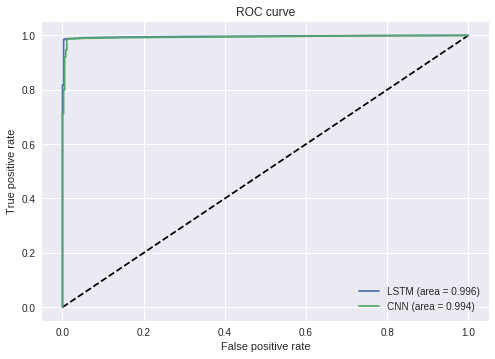

In [95]:
# LSTM and CNN ROC Curve
lstm_y_pred_keras = lstm_model.predict(x_test).ravel()
lstm_fpr_keras, lstm_tpr_keras, lstm_thresholds_keras = roc_curve(y_test, lstm_y_pred_keras)
lstm_auc_keras = auc(lstm_fpr_keras, lstm_tpr_keras)

cnn_y_pred_keras = cnn_model.predict(x_test).ravel()
cnn_fpr_keras, cnn_tpr_keras, cnn_thresholds_keras = roc_curve(y_test, cnn_y_pred_keras)
cnn_auc_keras = auc(cnn_fpr_keras, cnn_tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(lstm_fpr_keras, lstm_tpr_keras, label='LSTM (area = {:.3f})'.format(lstm_auc_keras))
plt.plot(cnn_fpr_keras, cnn_tpr_keras, label='CNN (area = {:.3f})'.format(cnn_auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Accroding to the ROC curve, each technique get a very high AUC sore and the score for LSTM is a little bit higher.